# Generate a world-wide grid, and the features for each point

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import jusipy

In [7]:
GLCF = jusipy.latlong_features.GLCF(resolution='8km')
CLL = jusipy.GIS.CountryLatLong()

In [14]:
land_grid = pd.DataFrame(jusipy.GIS.sample.grid_latlong(land=True, glcf=GLCF, lat_points=500),
                         columns=['lat', 'long'])
land_grid_countries = CLL.get(list(land_grid.values))
land_grid['country'] = land_grid_countries
land_grid_wrong = land_grid[pd.isna(land_grid.country)]
land_grid = land_grid[~pd.isna(land_grid.country)]
land_grid.to_pickle('data/grid_500.pkl')

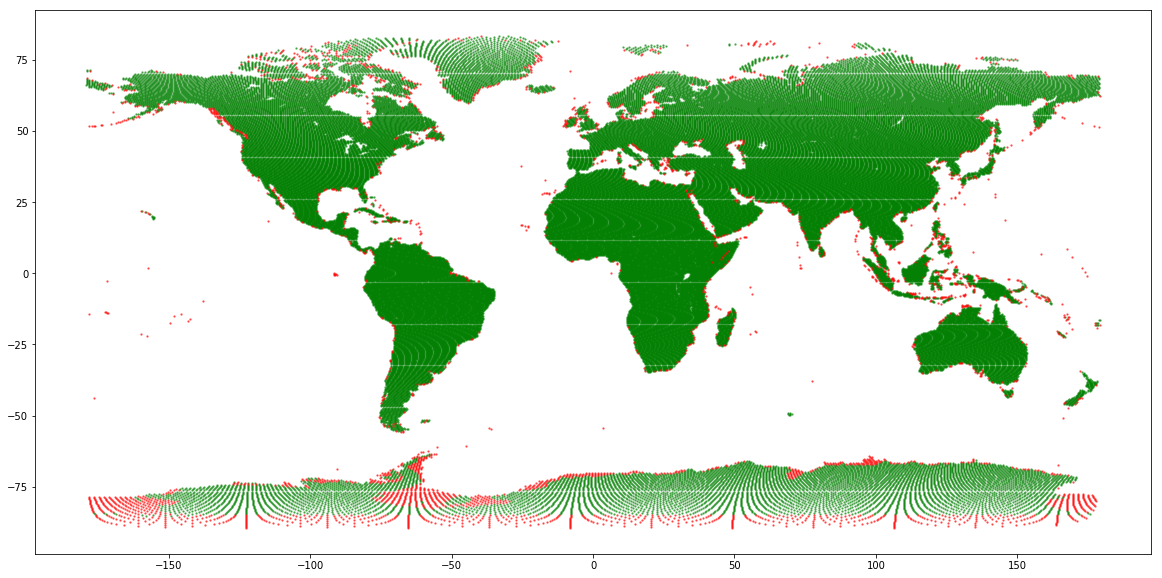

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(land_grid.long, land_grid.lat, s=2, c='g', alpha=0.5, zorder=1)
plt.scatter(land_grid_wrong.long, land_grid_wrong.lat, s=2, c='r', alpha=0.5, zorder=2)

In [2]:
land_grid = pd.read_pickle('data/grid_500.pkl')
ne = jusipy.latlong_features.NaturalEarth()
#country_features = jusipy.country_features.get(all_points, A_country)
latlong_features = jusipy.latlong_features.get(land_grid, ne)

Loading NaturalEarth(/Users/thiesgehrmann/repos/JuSiPy_Asser/jusipy/latlong_features/data/natural_earth/ne_10m_urban_areas)                                                                                                    

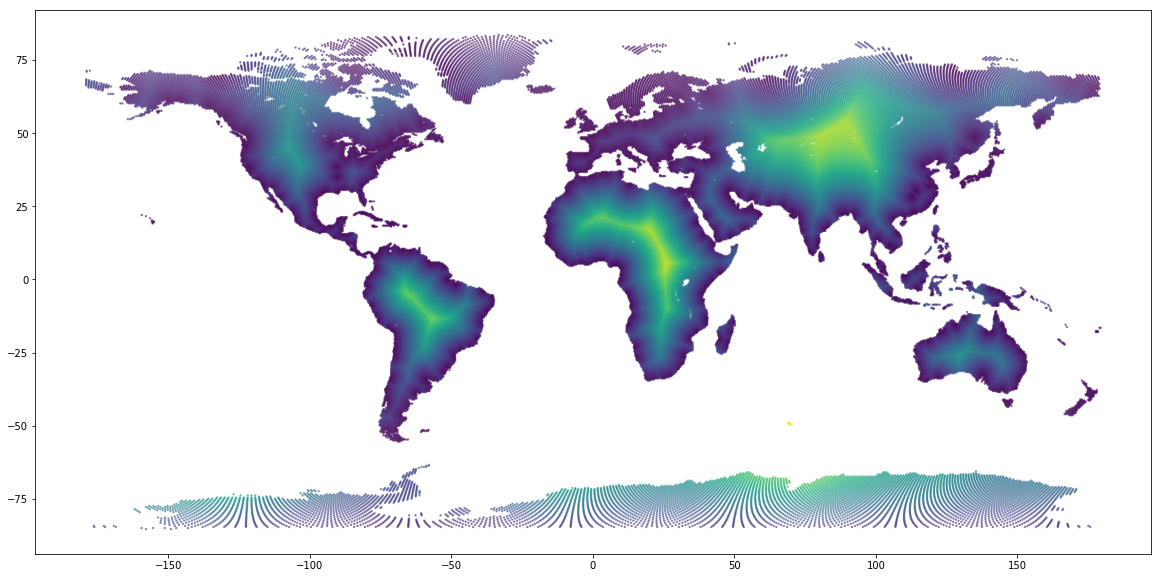

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(land_grid.long, land_grid.lat, s=2, c=latlong_features.nearest_port.values, alpha=0.5)

In [21]:
land_grid.to_pickle('data/grid_500.pkl')

In [27]:
np.any(pd.isna(latlong_features.nearest_airport))

False